In [1]:
import os, sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/walu/mdwarfs/ae_classifier/')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/ae_models')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/classifier_models')
#from save_recon_plots import save_recon_plots
import data_processor as dp
from dwarf_trainer import DwarfTrainer

In [2]:
dpc = dp.DataProcessing('../training_data/PULS_NonPULS_unbalanced.csv', input_dataset_shape=1024)


Shape of loaded data: (48717, 1026)
Label Mapping:
'NonPULS' -> 0
'PULS' -> 1
Input shape: 1024
Train set size: 34102
Validation set size: 14615
Number of classes: 2
Data processing completed.


In [4]:
"""
'lr' sets the learning rate for autoencoder and classifier
if separate learning rate for AE and classifier is needed, 
set lr for AE learning rate, and classifier_lr 
for classifier learning rate
"""

trainer = DwarfTrainer(
    data_processor= dpc,
    ae_model = 'nets_1024_bens_maxunpool',
    classifier_model = 'binary_classifier',
    model_id = 'binary_unbalanced_bens_maxunpool',
    batch_size = 256,
    num_epochs = 2000,
    lr = 1e-3,
    classifier_lr = 1e-4,
    scheduler_type = None,
    leaky_relu_a= 0.1,
    min_delta = 1e-4,
    patience = 300,
    training_mode = 'sequential',
    ae_epochs = 800,
    class_weighted_loss= True,
    save_val_recons= True
)

selected encoder: encode(
  (unflatten): Unflatten(dim=1, unflattened_size=(1, 32))
  (leakyrelu): LeakyReLU(negative_slope=0.1)
  (en_layer1): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (en_layer2): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (en_layer3): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (en_layer4): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Le

In [5]:
#trainer.set_lr(1e-4)
trainer.train_and_validate()

Sequential training mode: first training autoencoder for 800 epochs.
Epoch [1/2000], Train Recon: 37.9677
Epoch [2/2000], Train Recon: 9.2304
Epoch [3/2000], Train Recon: 8.0057
Epoch [4/2000], Train Recon: 7.6716
Epoch [5/2000], Train Recon: 7.4713
Epoch [6/2000], Train Recon: 7.3952
Epoch [7/2000], Train Recon: 7.3508
Epoch [8/2000], Train Recon: 7.3175
Epoch [9/2000], Train Recon: 7.2695
Epoch [10/2000], Train Recon: 7.2324
Epoch [11/2000], Train Recon: 7.2053
Epoch [12/2000], Train Recon: 7.1931
Epoch [13/2000], Train Recon: 7.1856
Epoch [14/2000], Train Recon: 7.1795
Epoch [15/2000], Train Recon: 7.1764
Epoch [16/2000], Train Recon: 7.1731
Epoch [17/2000], Train Recon: 7.1688
Epoch [18/2000], Train Recon: 7.1641
Epoch [19/2000], Train Recon: 7.1566
Epoch [20/2000], Train Recon: 7.1585
Epoch [21/2000], Train Recon: 7.1573
Epoch [22/2000], Train Recon: 7.1604
Epoch [23/2000], Train Recon: 7.1564
Epoch [24/2000], Train Recon: 7.1583
Epoch [25/2000], Train Recon: 7.1552
Epoch [26/2000

In [15]:
import torch
torch.save(trainer.model.state_dict(), f'model_binary_unbalanced_bens_maxunpool/best_model.pth')

In [21]:
trainer.load_best_model('model_binary_unbalanced_bens_maxunpool/best_model.pth')

Loaded model from model_binary_unbalanced_bens_maxunpool/best_model.pth


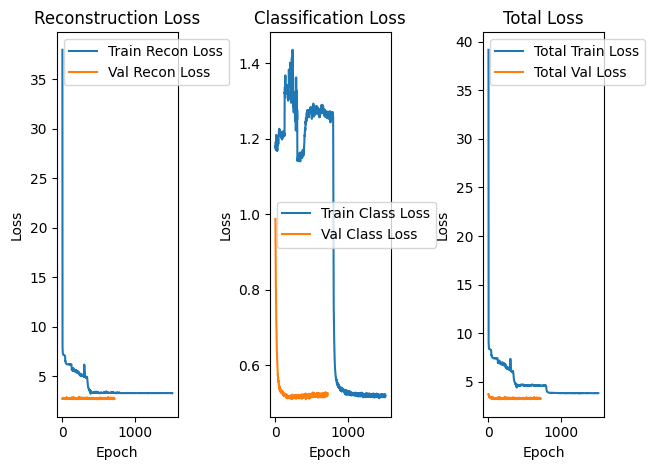

In [6]:
trainer.plot_losses()

Plotting accuracies for 722 epochs.


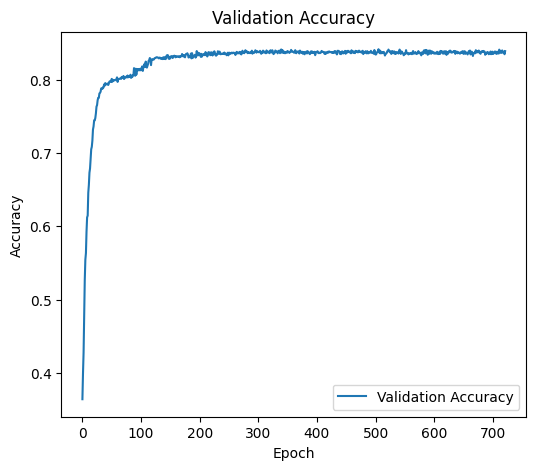

In [7]:
trainer.plot_accuracy()

<Figure size 800x600 with 0 Axes>

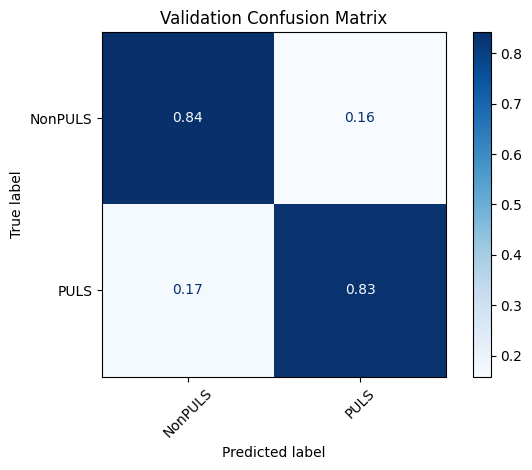

In [8]:
trainer.plot_confusion_matrix()